In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


# Imports required Library

In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# a Helper function to import images and labels from .csv file

In [3]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels

# Import data from the Sign language dataset

In [4]:
train_csv = '../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv'
test_csv = '../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv'
training_images, training_labels = get_data(train_csv)
testing_images, testing_labels = get_data(test_csv)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


# Create Data Generators from the images lists 

In [5]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


## Create the ML model and compile it with the appropriate Hyperparamaters

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(learning_rate= 0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


2022-08-06 21:15:50.054467: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Define a Callback class that stops training once accuracy reaches 99.9%

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

# Training and Evaluating the model

In [8]:
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                                steps_per_epoch=len(training_images) / 32,
                                epochs=30,
                                validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                                validation_steps=len(testing_images) / 32,
                                verbose = 1,
                                callbacks=[callbacks])

model.evaluate(testing_images, testing_labels)

2022-08-06 21:15:50.339587: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
857/857 [==============================] - 21s 23ms/step - loss: 2.8824 - accuracy: 0.1220 - val_loss: 2.1360 - val_accuracy: 0.3143
Epoch 2/30
857/857 [==============================] - 21s 24ms/step - loss: 2.1468 - accuracy: 0.3111 - val_loss: 1.7092 - val_accuracy: 0.4034
Epoch 3/30
857/857 [==============================] - 20s 23ms/step - loss: 1.7622 - accuracy: 0.4285 - val_loss: 1.3227 - val_accuracy: 0.5386
Epoch 4/30
857/857 [==============================] - 21s 24ms/step - loss: 1.5200 - accuracy: 0.4959 - val_loss: 1.1834 - val_accuracy: 0.5754
Epoch 5/30
857/857 [==============================] - 21s 24ms/step - loss: 1.3701 - accuracy: 0.5466 - val_loss: 0.7914 - val_accuracy: 0.7197
Epoch 6/30
857/857 [==============================] - 20s 23ms/step - loss: 1.2013 - accuracy: 0.6027 - val_loss: 0.7714 - val_accuracy: 0.7301
Epoch 7/30
857/857 [==============================] - 21s 24ms/step - loss: 1.0896 - accuracy: 0.6383 - val_loss: 0.5678 - val_accuracy:

[222.94882202148438, 0.6569994688034058]

## Evaluating Accuracy and Loss for the Model

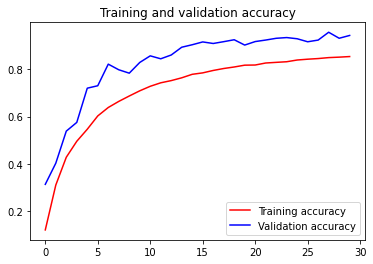

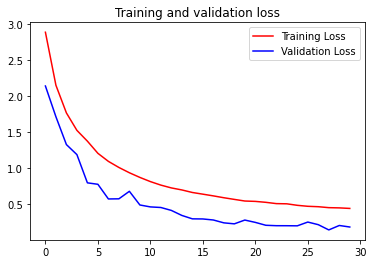

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()